# MRESCOPE Sample Data
サンプルコード（改良予定）

In [1]:
from package.subset_creator_merscope import MerscopeSubsetCreator
from package.reader_merscope import MerscopeDataReader
from package.viewer_merscope import MerscopeViewer

import os
from sotsuron.package_old.plot_polygon_viewer import read_select_transcripts_csv, load_and_convert_data, display_area

In [3]:
input_dir = "/work/datasets/Liver"
output_dir = "/work/github/output_sample_liver"

# subset分割
fov = 100
width = 2048
height = 2048
image_keyword = ["DAPI", "z3"]

saved to /work/github/output_sample_liver/subset100/detected_transcripts_subset100.pkl


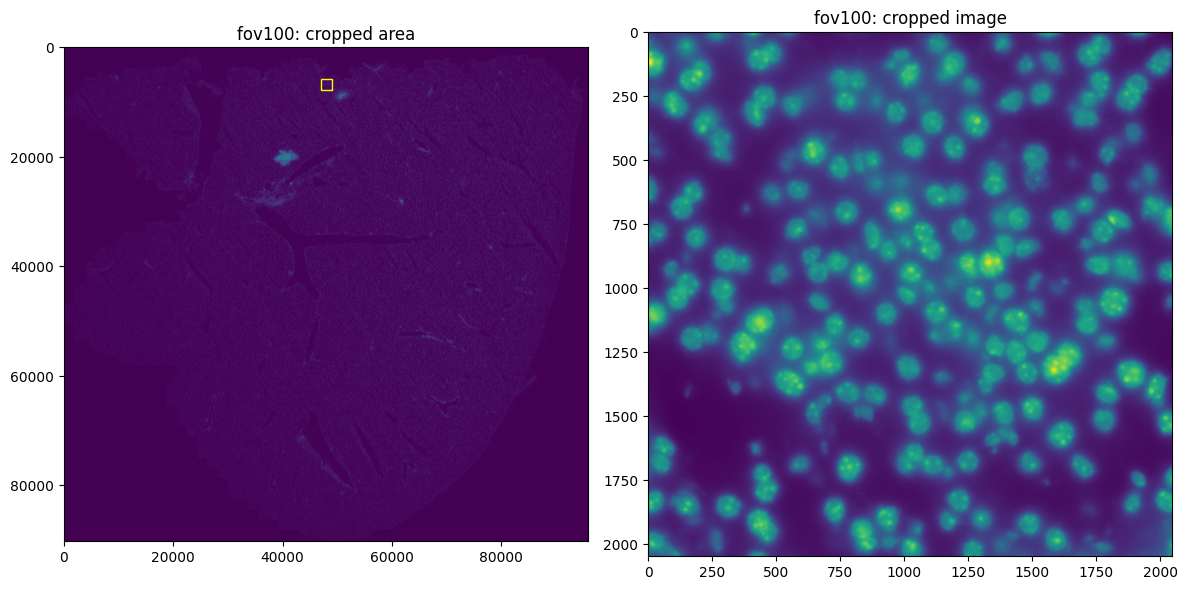

saved to /work/github/output_sample_liver/subset100/images/mosaic_DAPI_z3_subset100.png


In [5]:
subset = MerscopeSubsetCreator(input_dir, output_dir, fov, width, height, image_keyword)
subset.create_subset()

In [6]:
reader = MerscopeDataReader(input_dir, output_dir, fov, width, height, z=3)
gene_df, gene_name_list = reader.read_gene_data()
gene_df.head(5)

,Unnamed: 0,barcode_id,global_x,global_y,global_z,x,y,fov,gene,transcript_id,global_pixel_x,global_pixel_y,local_pixel_x,local_pixel_y
585535,78350,9,5245.4165,513.62570,3.0,109.35373,1940.3435,52,Serping1,ENSMUST00000023994,48953.971296,5755.603519,1897.971296,5.603519
596045,184444,31,5250.0060,513.14636,3.0,151.84584,1935.9052,52,Hsd3b3,ENSMUST00000125483,48996.466667,5751.165185,1940.466667,1.165185
598351,204163,35,5251.2495,513.41010,3.0,163.36356,1938.3470,52,Cebpa,ENSMUST00000042985,49007.980556,5753.607222,1951.980556,3.607222
598353,204166,35,5250.6104,513.63300,3.0,157.44377,1940.4110,52,Cebpa,ENSMUST00000042985,49002.062963,5755.671111,1946.062963,5.671111
599531,215891,37,5252.0034,513.56610,3.0,170.34090,1939.7917,52,Gck,ENSMUST00000109823,49014.961111,5755.051667,1958.961111,5.051667


In [7]:
subset_dir, img_dir = reader.get_path()
cell_data_dict, metadata_df = load_and_convert_data(input_dir, output_dir, fov)

In [15]:
for key in list(cell_data_dict.keys())[0:2]:
    print(f"{key}: {cell_data_dict[key]}")

100595371454505549590979639014740618876:        global_x    global_y  global_pixel_global_x  global_pixel_global_y  \
0   5192.159839  530.121996           48460.854062            5908.346999   
1   5193.785163  531.317196           48475.903360            5919.413665   
2   5194.531513  532.481670           48482.814008            5930.195836   
3   5194.985421  536.033256           48487.016864            5963.080891   
4   5194.569955  536.721593           48483.169956            5969.454380   
5   5194.300684  536.690840           48480.676703            5969.169630   
6   5194.281141  536.689502           48480.495747            5969.157241   
7   5194.261557  536.689940           48480.314413            5969.161298   
8   5194.242093  536.692151           48480.134192            5969.181767   
9   5194.222909  536.696116           48479.956567            5969.218479   
10  5194.204164  536.701802           48479.782998            5969.271133   
11  5192.070145  537.456441        

In [16]:
metadata_df.head(5)

,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y,global_pixel_center_x,global_pixel_center_y,local_pixel_center_x,local_pixel_center_y,global_pixel_max_x,global_pixel_max_y,local_pixel_max_x,local_pixel_max_y,global_pixel_min_x,global_pixel_min_y,local_pixel_min_x,local_pixel_min_y
cell_id,,,,,,,,,,,,,,,,,,,,
100595371454505549590979639014740618876,100,537.474544,5189.382425,536.291624,5183.779429,5194.985421,530.079468,542.503781,48435.137268,5965.473188,1379.137268,215.473188,48487.016864,6022.993153,1431.016864,272.993153,48383.257673,5907.953222,1327.257673,157.953222
10473878383849164097414322908711043058,100,166.033902,5094.042270,695.819966,5090.837619,5097.246921,691.424989,700.214944,47552.358054,7442.587467,496.358054,1692.587467,47582.030749,7483.281707,526.030749,1733.281707,47522.685359,7401.893227,466.685359,1651.893227
106194813782254879592399344624287110804,100,1398.041429,5243.398698,660.001320,5235.842998,5250.954398,649.098070,670.904570,48935.287942,7110.933331,1879.287942,1360.933331,49005.248130,7211.889351,1949.248130,1461.889351,48865.327755,7009.977312,1809.327755,1259.977312
106472842470975203647125273684121772798,100,273.818778,5198.625611,555.322605,5194.453289,5202.797933,551.046537,559.598673,48520.722324,6141.685970,1464.722324,391.685970,48559.354932,6181.279194,1503.354932,431.279194,48482.089715,6102.092747,1426.089715,352.092747
107513104163179480246705636812807431145,100,458.014790,5246.180769,535.265632,5240.483680,5251.877858,530.187467,540.343798,48961.047860,5955.973263,1905.047860,205.973263,49013.798682,6002.993312,1957.798682,252.993312,48908.297038,5908.953214,1852.297038,158.953214


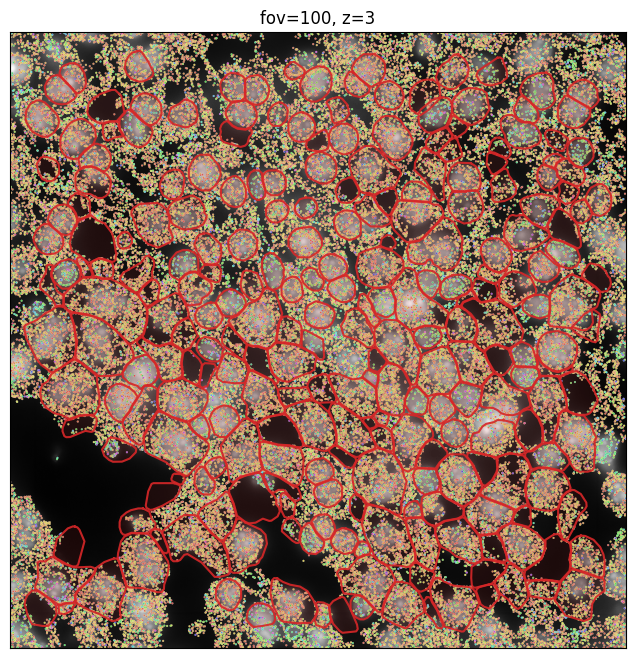

In [19]:
z = 3
total_gene_num = len(gene_name_list)
display_area(img_dir, fov, z, cell_data_dict, metadata_df, gene_df, gene_name_list, total_gene_num)

染色画像＋デフォルトセグメンテーション

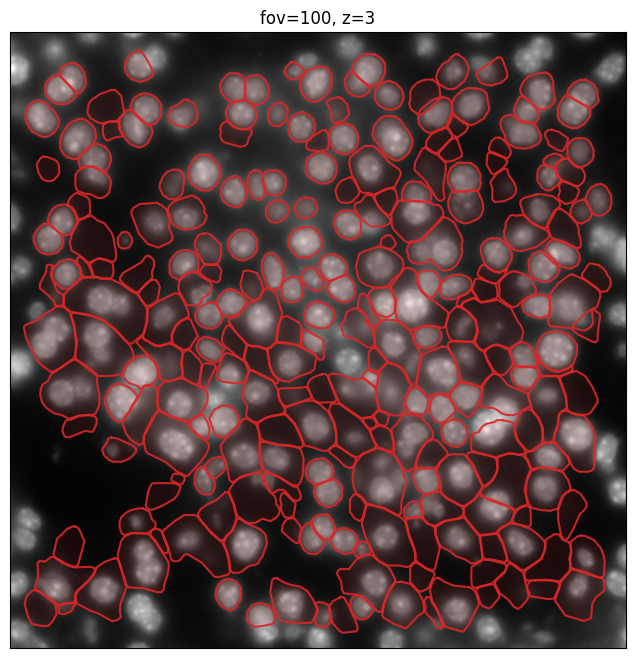

In [20]:
display_area(img_dir, fov, z, cell_data_dict, metadata_df, gene_df, gene_name_list, total_gene_num, show_plot=False)

染色画像＋遺伝子発現点のプロット

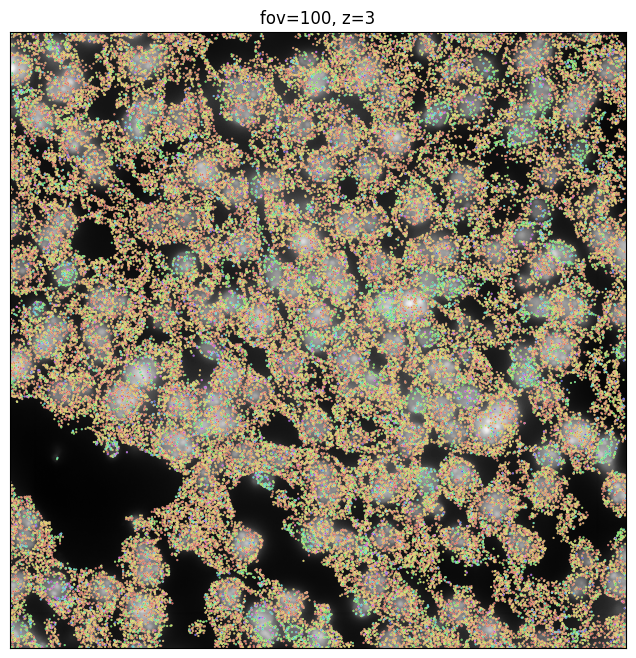

In [21]:
display_area(img_dir, fov, z, cell_data_dict, metadata_df, gene_df, gene_name_list, total_gene_num, show_polygon=False)

下記のコードで動作するように改良予定

In [ ]:
"""
viewer = MerscopeViewer(input_dir, output_dir, fov, width, height)
title = "default"
viewer.view_area(title, True, True, ["DAPI","z3"])
"""